In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


LungCap denotes tidal volume in Inches Cubed<br>
Age is in years<br>
Height is in Inches<br>
Caesarean is a medical term for C-section birth but we will not be using this data in our model

In [2]:
data = pd.read_csv('LungCapData.csv')
data

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


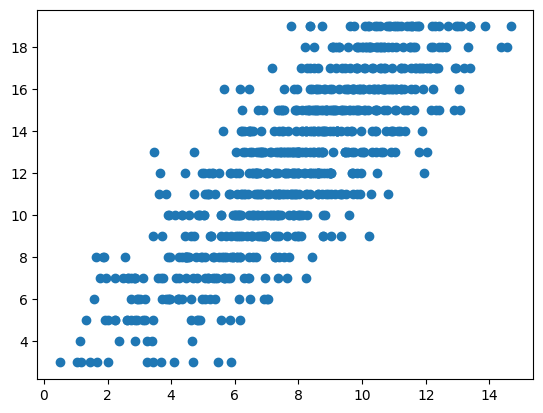

In [3]:
plt.scatter(data.LungCap, data.Age)

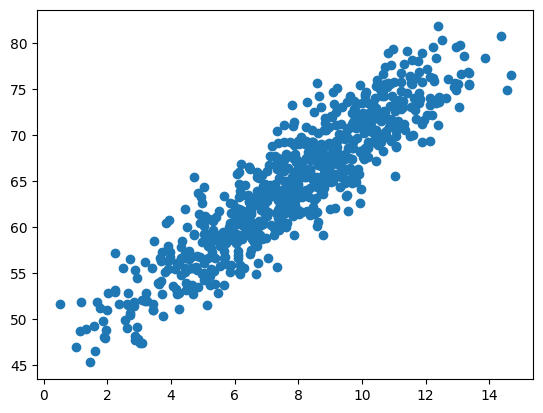

In [4]:
plt.scatter(data.LungCap, data.Height)

In [5]:
feature_cols = ['Age', 'Height', 'Smoke', 'Gender']
target_col = 'LungCap'

X = data[feature_cols]
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
numeric_features = ['Age', 'Height']
categorical_features = ['Gender', 'Smoke']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Height']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'Smoke'])])

In [7]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=2))
])

In [8]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Smoke'])])),
                ('regressor', RandomForestRegressor(random_state=2))])

In [9]:
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.8682963346439484
Mean Squared Error: 1.2753847541839056
R^2 Score: 0.8014869943790668


In [10]:
pct_error = (y_test - y_pred)/y_test * 100
pct_error = np.abs(pct_error)
np.mean(pct_error)

11.668609331882966

In [11]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [12]:
X_test.iloc[0:1]
print(X_test.iloc[0:1])
# model.predict(X_test.iloc[0:1])

     Age  Height Smoke Gender
326   15    69.0    no   male
